#1. Fundamentos de las RNN
# ¿Qué es una RNN?

Una Red Neuronal Recurrente (RNN) es una arquitectura diseñada para procesar datos secuenciales, como texto, audio, o series temporales.

A diferencia de las redes feedforward, las RNN tienen un **estado interno (memoria)** que les permite aprender relaciones entre elementos pasados de una secuencia.

Esto las hace útiles para tareas como:
- Clasificación de texto
- Predicción de series temporales
- Generación de texto o música
- Clasificación de imágenes tratadas como secuencia

### ¿Cómo funciona una RNN?

En cada paso de tiempo $ `t` $, la RNN toma una entrada $ `x_t` $ y combina su estado anterior $ `h_{t-1}` $ para producir una salida $ `h_t` $:

  - $ h_t = tanh(Wx * x_t + Wh * h_{t-1} + b) $

### Problemas comunes de las RNN tradicionales

1. **Desvanecimiento del gradiente**: cuando los gradientes son muy pequeños y el modelo deja de aprender.
2. **Explosión del gradiente**: cuando los gradientes se hacen muy grandes y provocan inestabilidad.

### Soluciones

- **LSTM (Long Short-Term Memory)**: usa puertas para mantener y olvidar información.
- **GRU (Gated Recurrent Unit)**: arquitectura similar a LSTM, pero más eficiente.

### Tipos de Arquitecturas RNN

- **Many-to-one**: múltiples entradas → una salida (como clasificación de texto).
- **One-to-many**: una entrada → múltiples salidas (como generación de texto).
- **Many-to-many**: secuencia de entrada → secuencia de salida (como traducción automática).

### ¿Qué es Backpropagation Through Time (BPTT)?

Es una extensión del algoritmo de retropropagación para RNN. Calcula los errores acumulados a lo largo del tiempo y actualiza los pesos.



## Descripción del Modelo Matemático de una RNN

En una Red Neuronal Recurrente (RNN), cada paso de tiempo procesa una entrada secuencial y actualiza su estado oculto utilizando una combinación lineal de la entrada actual y el estado anterior, seguido de una función de activación no lineal.

El modelo matemático básico de una RNN se define por las siguientes expresiones:

- **Estado oculto en el tiempo _t_**:
  \[
  $ h_t = \phi(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h) $
  \]
  Donde:
  - \($ h_t$\): estado oculto actual
  - \( $x_t$ \): entrada actual
  - \( $h_{t-1}$ \): estado oculto anterior
  - \( $W_{xh}$ \): pesos de entrada a estado oculto
  - \( $W_{hh}$ \): pesos de estado oculto a estado oculto
  - \( $b_h $\): sesgo del estado oculto
  - \( $\phi$ \): función de activación (generalmente tanh o ReLU)

- **Salida del modelo en el tiempo _t_**:
  \[
  $y_t = \psi(W_{hy} \cdot h_t + b_y)$
  \]
  Donde:
  - \( $y_t$ \): salida del modelo
  - \( $W_{hy}$ \): pesos de estado oculto a la salida
  - \( $b_y$ \): sesgo de la salida
  - \( $\psi$ \): función de activación de salida (por ejemplo, softmax para clasificación)

Este modelo permite que la red conserve una **memoria de los pasos anteriores** a través del estado oculto \( h_t \), y lo convierte en una herramienta adecuada para tareas con datos secuenciales. Variantes como **LSTM** y **GRU** extienden este modelo básico para manejar mejor las dependencias a largo plazo.


 # 2. Importación de librerías

In [ ]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

# 3. Carga del dataset MNIST

In [ ]:
# Carga del dataset (28x28 imágenes)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Forma de los datos:", x_train.shape)
print("Ejemplo de etiqueta:", y_train[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de los datos: (60000, 28, 28)
Ejemplo de etiqueta: 5


- **mnist.load_data()**: carga el conjunto de datos MNIST ya dividido en entrenamiento y prueba.

- **x_train, x_test**: imágenes (60,000 para entrenamiento, 10,000 para prueba).

- **y_train, y_test**: etiquetas correspondientes (dígitos del 0 al 9).

# 4. Visualización de imagenes

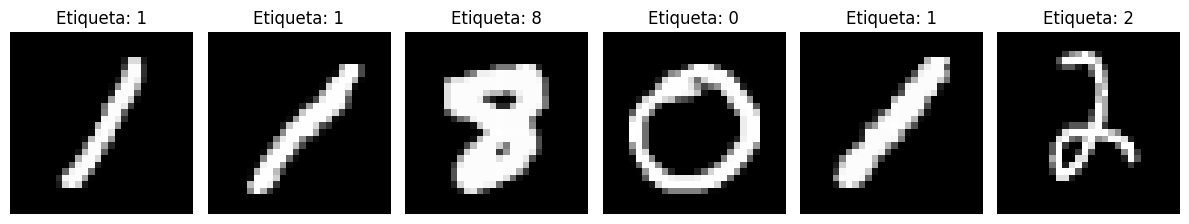

In [ ]:
# Detecta si y_train está codificado como one-hot
is_one_hot = len(y_train.shape) > 1 and y_train.shape[1] > 1

# Muestra 6 imágenes aleatorias con su etiqueta
indices = random.sample(range(len(x_train)), 6)

plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, 6, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    if is_one_hot:
        label = np.argmax(y_train[idx])
    else:
        label = y_train[idx]
    plt.title(f"Etiqueta: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

- **y_train.shape** da la forma del arreglo. Si tiene 2 dimensiones y la segunda es mayor a 1, está en one-hot (por ejemplo, (60000, 10)).

- **label = np.argmax(y_train[idx])**: Si es one-hot, usa np.argmax() para obtener el índice donde está el 1.

- **label = y_train[idx]**: Si es un entero directo (formato original), lo toma tal cual.

# 5. Preprocesamiento

In [ ]:
# Normalización a valores entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding de etiquetas
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Cada imagen = 28 pasos (filas), cada paso = 28 features (píxeles)
print("Nueva forma:", x_train.shape)

Nueva forma: (60000, 28, 28)


- **to_categorical(...)**: convierte etiquetas numéricas (0 a 9) en vectores one-hot de tamaño 10.

# 6. Definición del modelo RNN (SimpleRNN, LSTM o GRU)

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(28, 28)))
# model.add(LSTM(64, input_shape=(28, 28)))
# model.add(GRU(64, input_shape=(28, 28)))
model.add(Dropout(0.5)) #Evita el sobreajuste
model.add(Dense(10, activation='softmax'))  # 10 clases para dígitos del 0 al 9

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,602 (25.79 KB)

 Trainable params: 6,602 (25.79 KB)

 Non-trainable params: 0 (0.00 B)

- **Sequential()**: permite construir una red capa por capa de forma lineal.

- **SimpleRNN(64)**: capa RNN con 64 unidades (dimensión del estado oculto).

- **input_shape=(28, 28)**: cada imagen tiene 28 pasos temporales (filas) y cada paso tiene 28 características (columnas).

- **Dense(10)**: capa totalmente conectada con 10 neuronas (una por dígito).

- **activation='softmax'**: convierte las salidas en probabilidades que suman 1.

# 7. Compilación del modelo

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

- **loss='categorical_crossentropy'**: usada en clasificación multiclase con etiquetas one-hot.

- **optimizer='adam'**: optimizador adaptativo eficiente.

- **metrics=['accuracy']**: métrica para evaluar el rendimiento.

# 8. Entrenamiento del modelo

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
375/375 - 7s - 18ms/step - accuracy: 0.6529 - loss: 1.0522 - val_accuracy: 0.8591 - val_loss: 0.4975
Epoch 2/10
375/375 - 4s - 10ms/step - accuracy: 0.8479 - loss: 0.5232 - val_accuracy: 0.9067 - val_loss: 0.3295
Epoch 3/10
375/375 - 6s - 16ms/step - accuracy: 0.8890 - loss: 0.3996 - val_accuracy: 0.9137 - val_loss: 0.3033
Epoch 4/10
375/375 - 4s - 10ms/step - accuracy: 0.9047 - loss: 0.3469 - val_accuracy: 0.9308 - val_loss: 0.2441
Epoch 5/10
375/375 - 4s - 10ms/step - accuracy: 0.9130 - loss: 0.3164 - val_accuracy: 0.9293 - val_loss: 0.2449
Epoch 6/10
375/375 - 5s - 13ms/step - accuracy: 0.9209 - loss: 0.2917 - val_accuracy: 0.9333 - val_loss: 0.2316
Epoch 7/10
375/375 - 4s - 10ms/step - accuracy: 0.9293 - loss: 0.2667 - val_accuracy: 0.9451 - val_loss: 0.1946
Epoch 8/10
375/375 - 4s - 10ms/step - accuracy: 0.9320 - loss: 0.2472 - val_accuracy: 0.9462 - val_loss: 0.1854
Epoch 9/10
375/375 - 8s - 20ms/step - accuracy: 0.9368 - loss: 0.2376 - val_accuracy: 0.9434 - val_loss:

- **x_train, y_train**: datos de entrada y etiquetas.

- **epochs=10**: número de pasadas completas por el dataset.

- **batch_size=128**: tamaño de cada lote de datos.

- **validation_split=0.2**: 20% del set de entrenamiento se reserva como validación.

- **verbose=2**: muestra una salida resumida por época.

# 9. Evaluación

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9343 - loss: 0.2199
Precisión en test: 0.9424


#  10. Visualización de desempeño

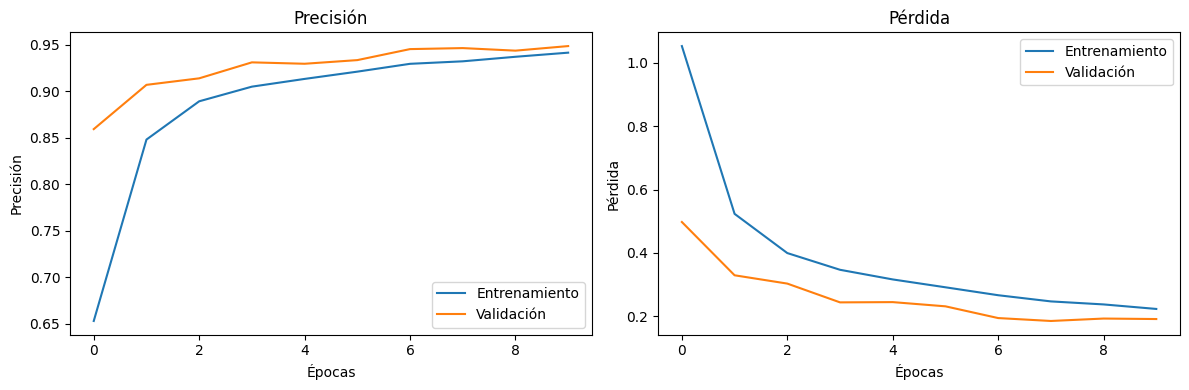

In [ ]:
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Precisión")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.tight_layout()
plt.show()

- **history.history**: contiene métricas registradas durante el entrenamiento.

  - **'accuracy'**: precisión en los datos de entrenamiento.

  - **'val_accuracy'**: precisión en el conjunto de validación.

# 11. Predicción con ejemplo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


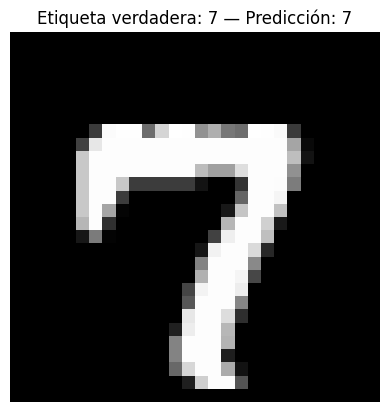

In [ ]:
# Selecciona una imagen aleatoria del set de prueba
idx = random.randint(0, len(x_test) - 1)
sample = x_test[idx].reshape(1, 28, 28)

# Predicción
pred = model.predict(sample)
predicted_label = np.argmax(pred)
true_label = np.argmax(y_test[idx])

# Mostrar resultado
plt.imshow(x_test[idx], cmap='gray')
plt.title(f"Etiqueta verdadera: {true_label} — Predicción: {predicted_label}")
plt.axis('off')
plt.show()

# 12. Precisión por clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.92      0.94      1032
           3       0.95      0.94      0.94      1010
           4       0.97      0.90      0.93       982
           5       0.87      0.97      0.92       892
           6       0.96      0.95      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.90      0.96      0.93       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



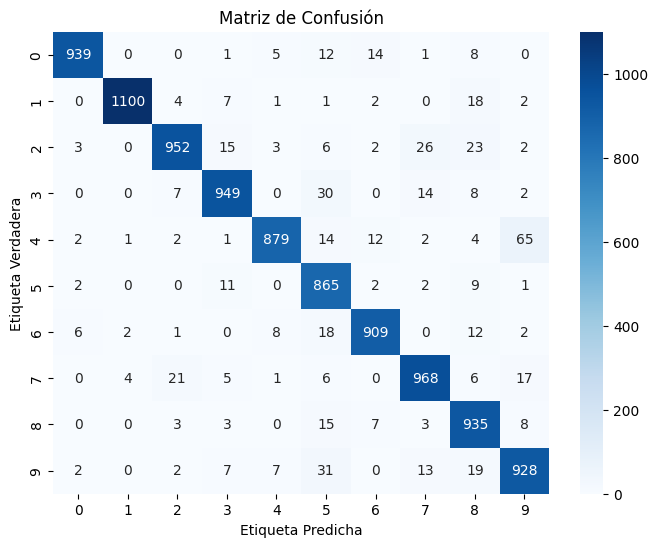

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicciones en lote
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Reporte por clase
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()

# 13. Comparación: SimpleRNN vs LSTM vs GRU

| Modelo     | Ventajas                             | Desventajas                        |
|------------|--------------------------------------|------------------------------------|
| SimpleRNN | Rápido y fácil de entender            | Problemas con secuencias largas    |
| LSTM       | Aprende dependencias a largo plazo  | Más lento, más parámetros          |
| GRU        | Más rápido que LSTM y buen desempeño | Menos interpretabilidad que LSTM   |